In [90]:
!pip install bokeh

In [191]:
import pandas as pd
import matplotlib.pyplot as plot
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool, ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20

In [2]:
!pip install openpyxl

In [136]:
df = pd.read_excel("roadaccidentsreport.xlsx")
df

,Year,Total
0,2003,391
1,2004,360
2,2005,326
3,2006,371
4,2007,350
5,2008,343
6,2009,347
7,2010,319
8,2011,308
9,2012,260


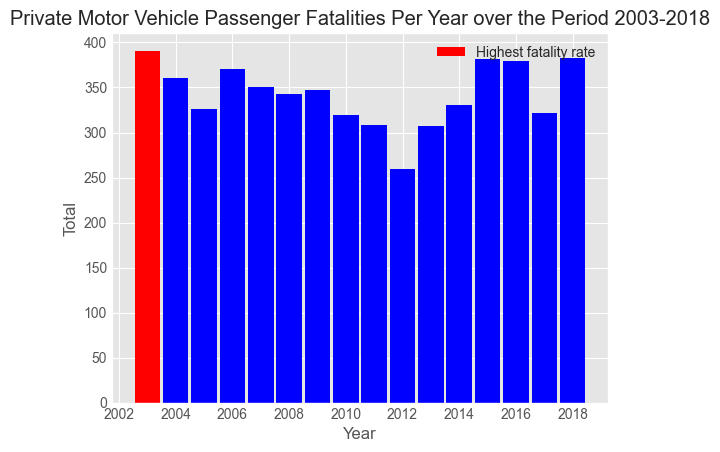

In [138]:
#https://mtm.gov.jm/roadsafety/images/Reports_And_Statistics/Annually/2018/Crash_Report_December_31_2018.pdf --page 21
colors = ['r' if (bar == max(df['Total'])) else 'blue' for bar in df['Total']]
plot.style.use('ggplot')
plot.xlabel('Year')
plot.ylabel('Total')
plot.bar(x=df['Year'], height=df['Total'], color=colors, width=0.9, label='Highest fatality rate')
plot.title('Private Motor Vehicle Passenger Fatalities Per Year over the Period 2003-2018')
plot.legend(loc='upper right', frameon=False)
plot.show()

In [140]:
src=ColumnDataSource(df)
TOOLTIPS = [
    ("Number", "@Total"),
    ("(Year,Total)", "(@Year, @Total)"),
]
p = figure(title='Private Motor Vehicle Passenger Fatalities Per Year Over the Period 2003-2018', x_axis_label='Year', y_axis_label='Total',
           tools='hover', tooltips=TOOLTIPS)
p.vbar(x='Year', top='Total', width=0.9, fill_color='blue', source=src, legend_label='Number of fatalities')

output_file("barchart.html")
show(p)

In [197]:
df2 = pd.read_excel("roadreport2.xlsx")
df2

,Category,Year,Year.1,Year.2,Year.3,Year.4,Year.5,Total
0,Unknown,2013,2014,2015,2016,2017,2018,0
1,Pedestrians,89,99,91,84,86,83,532
2,Pedal cyclists,26,29,26,32,15,24,152
3,Motorcyclists,56,65,111,96,97,99,524
4,Pillion passengers,8,8,8,13,14,15,66
5,Private Pass. Vehicle Passengers,17,25,11,18,6,10,87
6,Private Motor Car Passengers,49,36,52,72,35,56,300
7,Commercial Motor Passengers,3,9,6,3,4,9,34
8,Private Pass. Vehicle Drivers,8,5,6,5,2,10,36
9,Private Motor Car Drivers,49,50,67,52,53,70,341


In [205]:
src = ColumnDataSource(df2)
TOOLTIPS = [
    ("Number", "@Total"),
    ("(Category,Total)", "(@Category, @Total)"),
]

print(df2.columns)
print(df2[['Category', 'Total']])
categories = df2['Category'].unique()
scatterplot = figure(x_range=FactorRange(*categories), y_range=(0,600), width=800, height=800, title='Fatalities By Road Users', x_axis_label='Category', y_axis_label='Total',
            tools='hover', tooltips=TOOLTIPS)
categories=df2['Category'].unique()

colors=factor_cmap('Category', palette=Category20[len(categories)], factors=categories)
scatterplot.scatter(x='Category', y='Total', source=src, color=colors, legend_field='Category', size=10)
scatterplot.xaxis.major_label_orientation = 45
show(scatterplot)

Index(['Category', 'Year', 'Year.1', 'Year.2', 'Year.3', 'Year.4', 'Year.5',
       'Total'],
      dtype='object')
                            Category  Total
0                            Unknown      0
1                        Pedestrians    532
2                     Pedal cyclists    152
3                      Motorcyclists    524
4                 Pillion passengers     66
5   Private Pass. Vehicle Passengers     87
6       Private Motor Car Passengers    300
7        Commercial Motor Passengers     34
8      Private Pass. Vehicle Drivers     36
9          Private Motor Car Drivers    341
10      Commercial Motor Car Drivers     29
11                             Other      3
